# Visualisation and basic processing

In [1]:
import turicreate as tc

In [2]:
%ls processed-data

Daily-Brent-Index.csv  rsp-data.csv           sector-wise-gdp.csv


## We load the data into SFrames

In [4]:
sf_brent = tc.SFrame('./processed-data/Daily-Brent-Index.csv')
sf_rsp = tc.SFrame('./processed-data/rsp-data.csv')
sf_gdp = tc.SFrame('./processed-data/sector-wise-gdp.csv')

Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/Daily-Brent-Index.csv

Parsing completed. Parsed 100 lines in 0.008853 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/Daily-Brent-Index.csv

Parsing completed. Parsed 8554 lines in 0.008288 secs.

Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/rsp-data.csv

Parsing completed. Parsed 56 lines in 0.006405 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,int,float,float,int,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/rsp-data.csv

Parsing completed. Parsed 56 lines in 0.006283 secs.

Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/sector-wise-gdp.csv

Parsing completed. Parsed 38 lines in 0.005928 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,int,int,int,int,int,int,int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/SaharshShukla/My Documents/Non Core/Econometrics/Oil-Price-Analysis-Data/processed-data/sector-wise-gdp.csv

Parsing completed. Parsed 38 lines in 0.007913 secs.

### Basic Visualisations

In [5]:
sf_rsp.head()

Region,Date,Urban EstimatedUnemployment Rate (%) ...,Urban Estimated Employed,Urban Estimated LabourParticipation Rate (%) ...,Rural EstimatedUnemployment Rate (%) ...
Delhi,31/05/19,12.31,5756475,44.17,12.56
Delhi,30/06/19,12.76,5550172,42.71,9.33
Delhi,31/07/19,14.68,5393091,42.34,11.07
Delhi,31/08/19,13.52,5552510,42.9,17.18
Delhi,30/09/19,20.59,5642253,47.36,12.5
Delhi,31/10/19,12.41,6030363,45.78,15.84
Delhi,30/11/19,16.11,5439600,43.02,11.11
Delhi,31/12/19,11.07,5718337,42.56,16.97
Delhi,31/01/20,22.45,5647493,48.09,13.48
Delhi,29/02/20,14.86,5708807,44.18,13.81


In [6]:
sf_rsp = sf_rsp.remove_column('X10')

In [7]:
import matplotlib.pyplot as plt

In [8]:
sf_rsp_DL = sf_rsp[sf_rsp['Region'] == 'Delhi']
sf_rsp_WB = sf_rsp[sf_rsp['Region'] == 'West Bengal']
sf_rsp_MH = sf_rsp[sf_rsp['Region'] == 'Maharashtra']
sf_rsp_TN = sf_rsp[sf_rsp['Region'] == 'Tamil Nadu']

In [9]:
import datetime as dt
sf_rsp_DL['Date']= sf_rsp_DL['Date'].str_to_datetime("%d/%m/%y")
sf_rsp_MH['Date']= sf_rsp_MH['Date'].str_to_datetime("%d/%m/%y")
sf_rsp_TN['Date']= sf_rsp_TN['Date'].str_to_datetime("%d/%m/%y")
sf_rsp_WB['Date']= sf_rsp_WB['Date'].str_to_datetime("%d/%m/%y")

In [10]:
def plot_cust(sf):
    fig, ax = plt.subplots()
    ax.plot(sf['Date'], sf['Oil RSP'], '-b', label='Oil Prices')
    ax.plot(sf['Date'], sf['Urban Estimated Unemployment Rate (%)'], '-g', label='Urban Unemployment')
    ax.plot(sf['Date'], sf['Rural Estimated Unemployment Rate (%)'], '-r', label='Rural Unemployment')
    #ax.axis('equal')
    leg = ax.legend();

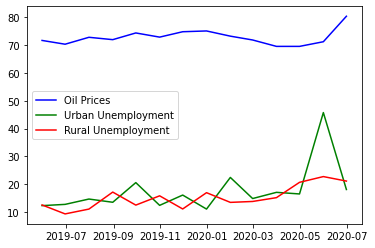

In [11]:
plot_cust(sf_rsp_DL)

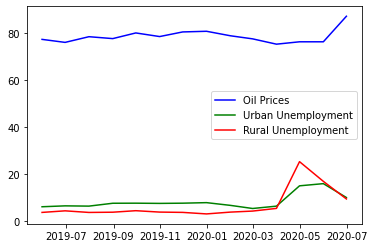

In [12]:
plot_cust(sf_rsp_MH)

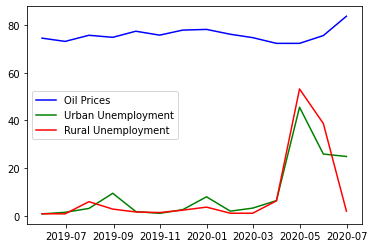

In [13]:
plot_cust(sf_rsp_TN)

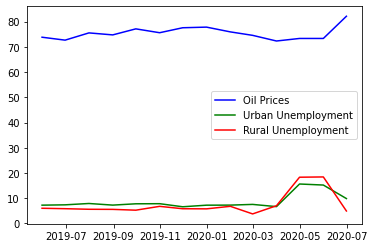

In [14]:
plot_cust(sf_rsp_WB)

In [15]:
import seaborn as sns
import pandas as pd

In [16]:
df_rsp_DL = sf_rsp_DL.to_dataframe()
df_rsp_MH = sf_rsp_MH.to_dataframe()
df_rsp_TN = sf_rsp_TN.to_dataframe()
df_rsp_WB = sf_rsp_WB.to_dataframe()

In [17]:
df_rsp_DL.corr();

In [18]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

In [19]:
def getHeatMap(df):
    columns = df.columns
    corr = df[columns].corr()
    corr = pd.melt(corr.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        x=corr['x'],
        y=corr['y'],
        size=corr['value'].abs()
    )

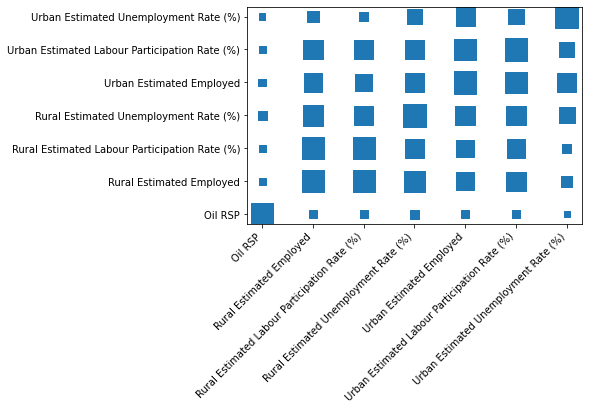

In [20]:
getHeatMap(df_rsp_DL)

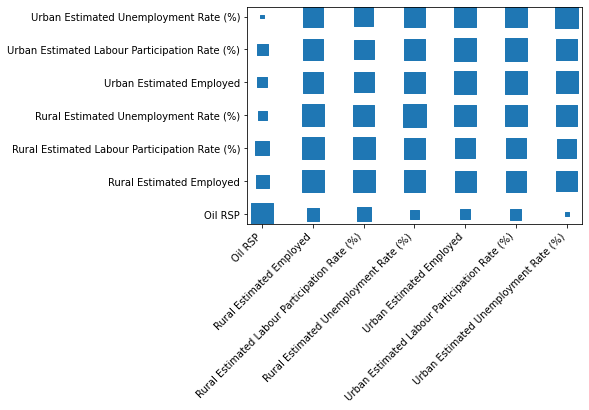

In [21]:
getHeatMap(df_rsp_MH)

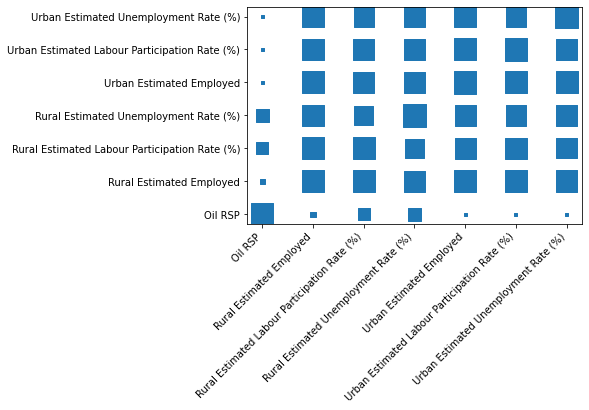

In [22]:
getHeatMap(df_rsp_TN)

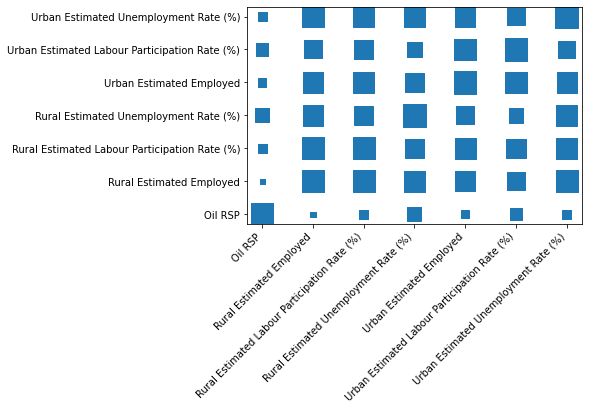

In [23]:
getHeatMap(df_rsp_WB)

In [24]:
def getCorrelationPlot(data):
    corr = data.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

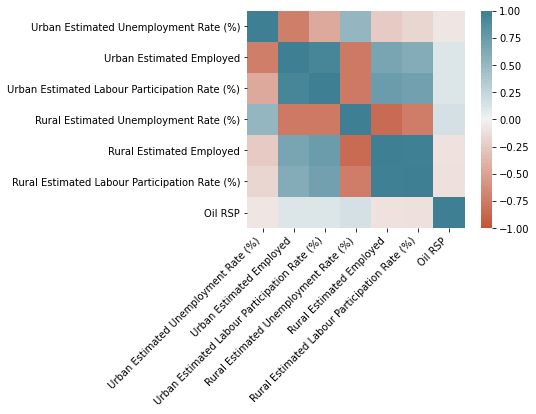

In [25]:
getCorrelationPlot(df_rsp_DL)

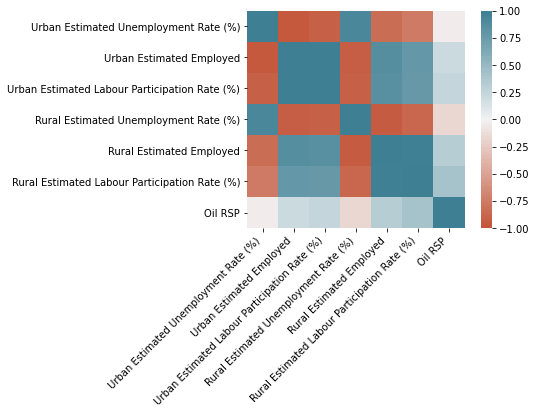

In [26]:
getCorrelationPlot(df_rsp_MH)

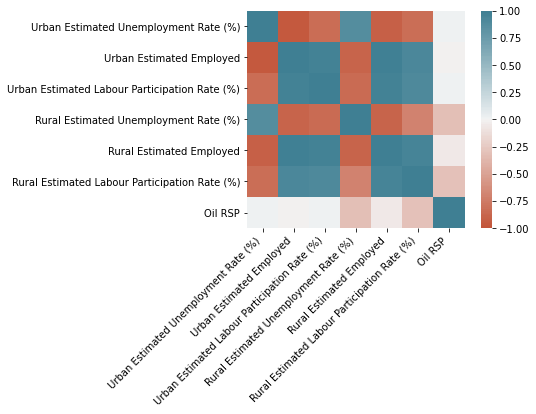

In [27]:
getCorrelationPlot(df_rsp_TN)

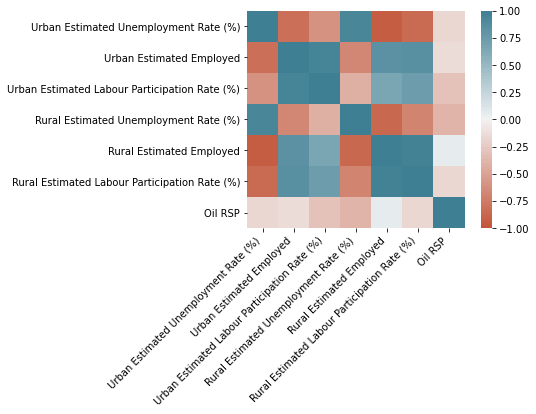

In [28]:
getCorrelationPlot(df_rsp_WB)

In [29]:
from sklearn.cluster import KMeans
import numpy as np
# k means
def get_Kmeans(df, col1, col2):
    kmeans = KMeans(n_clusters=3, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[[col1, col2]])
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    ## add to df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
    # define and map colors
    colors = ['#DF2020', '#81DF20', '#2095DF']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    plt.scatter(df[col1], df[col2], c=df.c, alpha = 0.6, s=10)
    return df

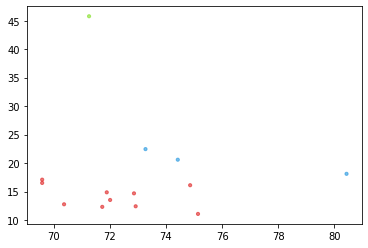

In [30]:
df_rsp_DL = get_Kmeans(df_rsp_DL, 'Oil RSP', 'Urban Estimated Unemployment Rate (%)')

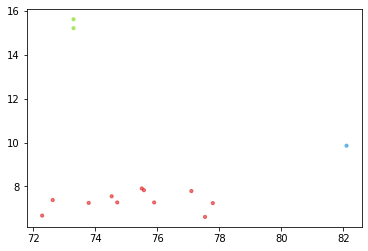

In [31]:
df_rsp_WB = get_Kmeans(df_rsp_WB, 'Oil RSP', 'Urban Estimated Unemployment Rate (%)')

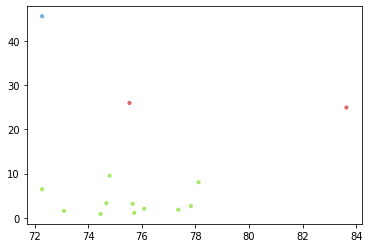

In [32]:
df_rsp_TN = get_Kmeans(df_rsp_TN, 'Oil RSP', 'Urban Estimated Unemployment Rate (%)')

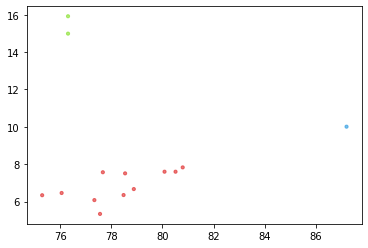

In [33]:
df_rsp_MH = get_Kmeans(df_rsp_MH, 'Oil RSP', 'Urban Estimated Unemployment Rate (%)')

In [56]:
from matplotlib.lines import Line2D
def get_Centroid_plot(df, col1, col2):
    kmeans = KMeans(n_clusters=3, random_state=0)
    df['cluster'] = kmeans.fit_predict(df[[col1, col2]])
    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    ## add to df
    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
    # define and map colors
    colors = ['#DF2020', '#81DF20', '#2095DF']
    df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    fig, ax = plt.subplots(1, figsize=(8,8))
    # plot data
    plt.scatter(df[col1], df[col2], c=df.c, alpha = 0.6, s=10)
    # plot centroids
    plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    # plot Attack mean
    plt.plot([df[col1].mean()]*2, [0,50], color='black', lw=0.5, linestyle='--')
    plt.xlim(0,200)
    # plot Defense mean
    plt.plot([0,50], [df[col2].mean()]*2, color='black', lw=0.5, linestyle='--')
    plt.ylim(0,200)
    # create a list of legend elemntes
    ## average line
    legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
    ## markers / records
    cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
    ## centroids
    cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
    # add all elements to the same list
    legend_elements.extend(cluster_leg)
    legend_elements.extend(cent_leg)
    # plot legend
    plt.legend(handles=legend_elements, loc='upper right', ncol=2)
    # title and labels
    plt.title('Stats\n', loc='left', fontsize=22)
    plt.xlabel(col1)
    plt.ylabel(col2)

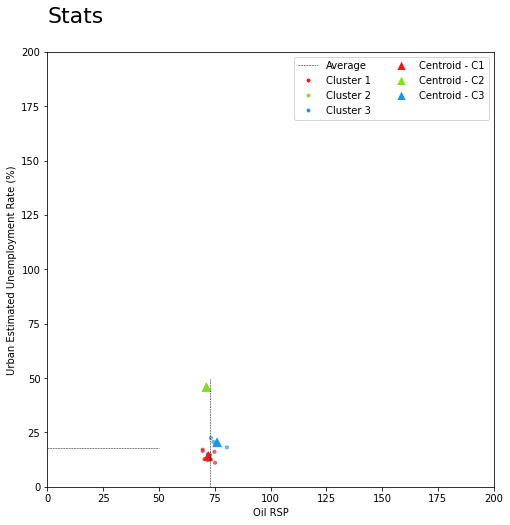

In [57]:
get_Centroid_plot(df_rsp_DL,'Oil RSP','Urban Estimated Unemployment Rate (%)')

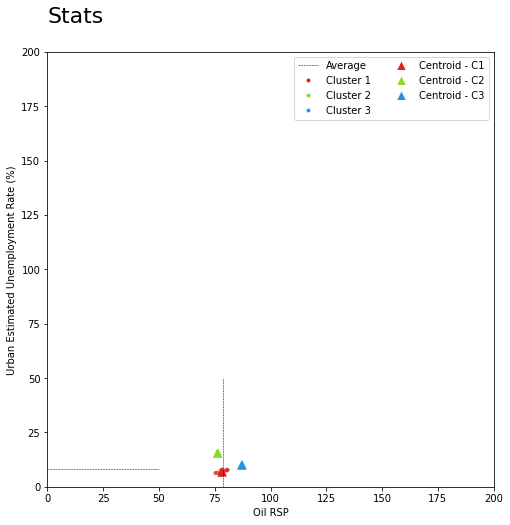

In [58]:
get_Centroid_plot(df_rsp_MH,'Oil RSP','Urban Estimated Unemployment Rate (%)')

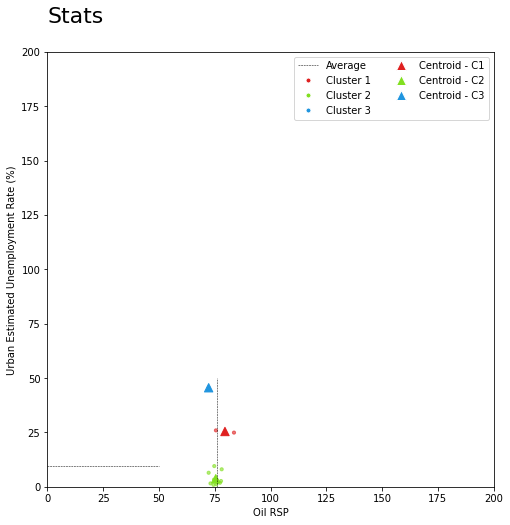

In [59]:
get_Centroid_plot(df_rsp_TN,'Oil RSP','Urban Estimated Unemployment Rate (%)')

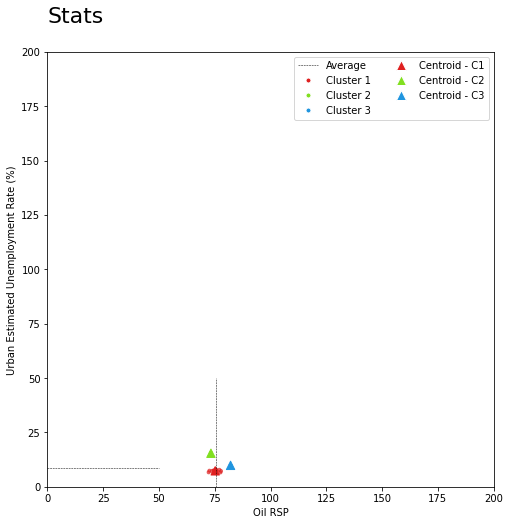

In [60]:
get_Centroid_plot(df_rsp_WB,'Oil RSP','Urban Estimated Unemployment Rate (%)')